## 1. DATA MANIPULATIONS

### 1.1. In our case, two manipulations should be made to datesets.

    1. In all of the datasets, there are one redundant data at the most left side per row. Looks like these are some 
    kind of 'id' features, but in our case we don't need them. So first thing, we need to get rid of these.
    2. In datatest2, there are lack of double quotes (") around the 'date' column. To use our data efficiently, we 
    need to add them.

In [7]:
lines = []
#First, we need to read the txt file. Then get every line of the file into an array: lines.
with open('/home/emremrah/Desktop/DataMin/Project1/datatraining.txt', 'r') as file:
    lines = file.readlines()
    
new_lines = []
#Copy the 'header' row first.
new_lines.append(lines[0])
# Then, to copy each row, after split them by comma, we skip the most left data, and copy rest of it.
for line in lines[1:]:
    new_lines.append(','.join(l for l in line.split(',')[1:]))

# Then write our new data into a CSV file.
with open('/home/emremrah/Desktop/DataMin/Project1/datatraining.csv', 'w') as file:
    file.writelines(new_lines)
    
################################################################################
    
with open('/home/emremrah/Desktop/DataMin/Project1/datatest.txt', 'r') as file:
    lines = file.readlines()
    
new_lines = []
new_lines.append(lines[0])
for line in lines[1:]:
    new_lines.append(','.join(l for l in line.split(',')[1:]))
    
with open('/home/emremrah/Desktop/DataMin/Project1/datatest.csv', 'w') as file:
    file.writelines(new_lines)

################################################################################
    
with open('/home/emremrah/Desktop/DataMin/Project1/datatest2.txt', 'r') as file:
    lines = file.readlines()
    
new_lines = []
new_lines.append(lines[0])
# Here, we will add the quotes around the 'date' column.
for line in lines[1:]:
    i = line.index(',') + 1
    i2 = line[i:].index(',')
    line = line[:i] + '"' + line[i:i+i2] + '"' + line[i+i2:]
    new_lines.append(','.join(l for l in line.split(',')[1:]))
    
with open('/home/emremrah/Desktop/DataMin/Project1/datatest2.csv', 'w') as file:
    file.writelines(new_lines)

#### After this, we can get our data to a pandas dataframe.

In [8]:
import pandas as pd
import numpy as np
import sklearn

path = "/home/emremrah/Desktop/DataMin/Project1/datatraining.csv"
train = pd.read_csv(path)
path = "/home/emremrah/Desktop/DataMin/Project1/datatest.csv"
test = pd.read_csv(path)
path = "/home/emremrah/Desktop/DataMin/Project1/datatest2.csv"
test2 = pd.read_csv(path)

#### Now, let's take a look to our data.

In [9]:
print("Training set:\n{}".format(train.head()))
# print("\nTest set #1:\n{}".format(test.head()))
# print("\nTest set #2:\n{}".format(test2.head()))
print("\nKeys of TRAINING data:\n{}".format(train.keys()))
print("\nKeys of TEST1 data:\n{}".format(test.keys()))
print("\nKeys of TEST2 data:\n{}".format(test.keys()))

Training set:
                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
0  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
1  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
2  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
3  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
4  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
0          1  
1          1  
2          1  
3          1  
4          1  

Keys of TRAINING data:
Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

Keys of TEST1 data:
Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

Keys of TEST2 data:
Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')


#### As you can see, all of them have the same struct. After some time, we are going to drop the 'Occupancy' column from training set, and drop all features except 'Occupancy' column from test1 and test2 sets to first train then test our models.

### 1.2. After that, here is another struggle, the date feature can't be processed by our algorithms right now.

    So, I want to change the date to a 'Weekday' feature. By doing that, from monday to sunday, each day will
    correspond to an integer number from 0 to 6. Which can be used by our algorithms.
    
    To do that I use datetime.strptime function to get weekday from our preprocessed 'date' data.
    
##### Also, I want to use the date data more:
    
    It would be unefficient if I get a "Season" feature from "date", because whatever the season is, work hours won't be changed. People always be at work at the same hours everyday.
    
    So as we saying "Hours", "Occupancy" may be changed during hours in a day due to 'lunchtime', or 'office hours'. So I want to add a 'Weekday' and a 'Hour' feature by using datetime.

In [10]:
import datetime

train["H"] = train["date"]
test["H"] = test["date"]
test2["H"] = test2["date"]

def ch(st):
    return datetime.datetime.strptime(st, '%Y-%m-%d %H:%M:%S').hour

def dt(st):
    return datetime.datetime.strptime(st, '%Y-%m-%d %H:%M:%S').weekday()

for i, dd in enumerate(train['date']):
    train.iloc[i, train.columns.get_loc('H')] = ch(train['date'].iloc[i])
    train.iloc[i, train.columns.get_loc('date')] = dt(train['date'].iloc[i])
    
for i, dd in enumerate(test['date']):
    test.iloc[i, test.columns.get_loc('H')] = ch(test['date'].iloc[i])
    test.iloc[i, test.columns.get_loc('date')] = dt(test['date'].iloc[i])
    
for i, dd in enumerate(test2['date']):
    test2.iloc[i, test2.columns.get_loc('H')] = ch(test2['date'].iloc[i])
    test2.iloc[i, test2.columns.get_loc('date')] = dt(test2['date'].iloc[i])

#### Now our 'date' column consists weekdays as 'date' from 0 to 6 and hours as 'H' from 0 to 23. 

In [11]:
print("Training set:\n{}".format(train.head()))

Training set:
   date  Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy   H
0     2        23.18   27.2720  426.0  721.25       0.004793          1  17
1     2        23.15   27.2675  429.5  714.00       0.004783          1  17
2     2        23.15   27.2450  426.0  713.50       0.004779          1  17
3     2        23.15   27.2000  426.0  708.25       0.004772          1  17
4     2        23.10   27.2000  426.0  704.50       0.004757          1  17


## 2. CLOSE LOOK TO DATASET

#### After preparing our data to proceed, we will take a close look to understand what we have.

### 2.1. Understanding the data

#### Lets take a look to our data's shape:

In [12]:
print("\nTrain shape: {}".format(train.shape))
print("\nTest1 shape: {}".format(test.shape))
print("\nTest2 shape: {}".format(test2.shape))


Train shape: (8143, 8)

Test1 shape: (2665, 8)

Test2 shape: (9752, 8)


#### As seen, since our data already has splitted, we don't need to split it again.
    
#### Several things should be made right now:
    
    In all of data, we are going to split them to x and y (input-output).
    
    Since 'Occupancy' isn't a feature, it's our output that we want to predict, we must seperate it from X (input)
    sets; we only want it in the y (output) sets. If we don't do that, models will suppose 'Occupancy' is a feature,
    but it's not.
    

In [13]:
target = train["Occupancy"].values
target2 = test["Occupancy"].values
target3 = test2["Occupancy"].values

xtrain = train.loc[:, train.columns.values]
del xtrain["Occupancy"]
ytrain = target

xtest = test.loc[:, test.columns.values]
del xtest["Occupancy"]
ytest = target2

xtest2 = test2.loc[:, test2.columns.values]
del xtest2["Occupancy"]
ytest2 = target3

#### Here we made it. Now all train data have features except 'Occupancy', and all test data have only 'Occupancy'.

In [14]:
print("xtrain shape: {}\n".format(xtrain.shape))
print("ytrain shape: {}\n".format(ytrain.shape))
print("ytrain: {}\n".format(ytrain))

xtrain shape: (8143, 7)

ytrain shape: (8143,)

ytrain: [1 1 1 ..., 1 1 1]



### From now, we have the basic tools properly: inputs and outputs, features ect.

    Now before we make an actual model, it's would be nice to look at our data visually. The simplest way to do this
    is plotting the data.

In [15]:
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import mglearn
%matplotlib inline

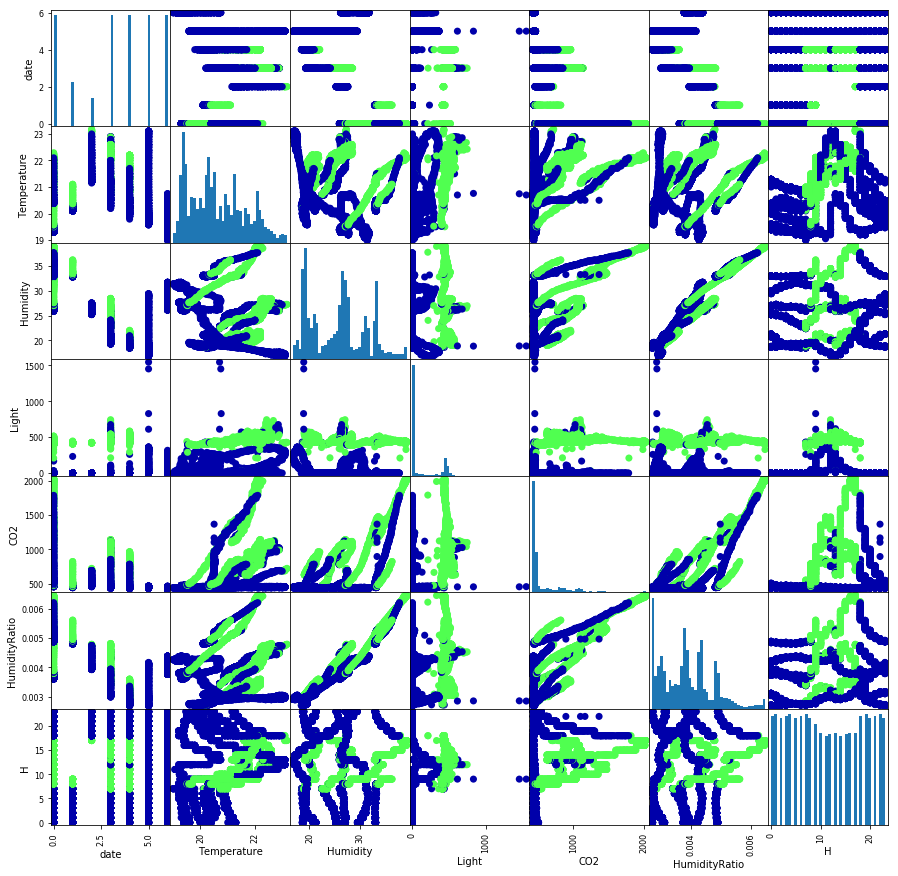

In [16]:
dataframe = pd.DataFrame(xtrain, columns=xtrain)
pd.plotting.scatter_matrix(xtrain, c = ytrain, figsize = (15,15), marker='o', 
                           hist_kwds={'bins': 40}, s=50, alpha=1, cmap=mglearn.cm3)
plt.show()

As we can see, the most efficient features are 'Light' and 'CO2' due to these features gives us distinct informations and they are not too much collerated.

Besides, there is a few combinations that really bad, like: Hour and Temperature. This information gives us that temperature can't give us distinct information about Occupancy in the hours of a day. So we say this features are 'collerated'.

Also, Humidity (btw Humidity is revelant with Temperature) and Hour pair is the worst, too.

But we can use Hour feature to get more accuracy with Weekday feature.

## 3. APPLYING ALGORITHMS

### Now we can consider fit a model. As a simple algorithm, KNearestNeighbor is the best choice to warm-up.

### 3.1. KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = 20
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

Now, we fitted our xtrain and ytrain set to knn model. Fitting means, the algorithm took inputs from xtrain, and learned "which feature value gives which output?"

#### And at last, now we will going to see our model's score among train sets:

In [18]:
print("KNN TRAIN score with " + str(neighbors) +" neighbors: {}".format(knn.score(xtrain, ytrain)))

KNN TRAIN score with 20 neighbors: 0.9884563428711777


#### Here we go, our model gives %100 accuracy the training set!

#### Now that we have an issue, overfit, means: our model is so complex that gives too high accuracy on the training data while giving not so high on the test data. So, to see if we got overfitness, let's take a look out test score:

In [19]:
print("KNN TEST1 score with " + str(neighbors) +" neighbors: {}".format(knn.score(xtest, ytest)))
print("KNN TEST2 score with " + str(neighbors) +" neighbors: {}".format(knn.score(xtest2, ytest2)))

KNN TEST1 score with 20 neighbors: 0.9726078799249531
KNN TEST2 score with 20 neighbors: 0.9697497949138638


#### As we mentioned, our test accuracy is nearly %4 and %7 less than train accuracy. %4 is acceptable though, but this much difference means we got overfitted.

As you may noticed, there is a parameter in KNN named "n_neighbors". This parameters determines how many neighbors will be checked up in the KNN model. We can use this parameter to get bettter accuracy.

I've tried some different neighbors and got some better accuracies. Now I am going to show the differences in a loop and with a chart:

#### Since we have over thousands of data, neighbors don't have to be around 10. So we are going to hit 100 neighbors!

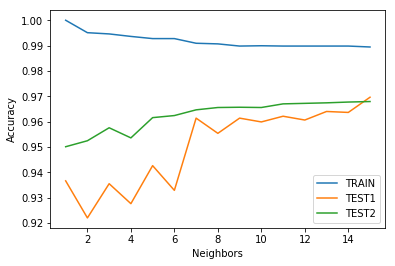

In [20]:
set_neighbors = range(1, 16)
train_acc = []
test1_acc = []
test2_acc = []

for n in set_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain, ytrain)
    train_acc.append(knn.score(xtrain, ytrain))
    test1_acc.append(knn.score(xtest, ytest))
    test2_acc.append(knn.score(xtest2, ytest2))
    
plt.plot(set_neighbors, train_acc, label="TRAIN")
plt.plot(set_neighbors, test1_acc, label="TEST1")
plt.plot(set_neighbors, test2_acc, label="TEST2")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

#### But still, it's clear that there is no improvement (actually, there is downgrade) after a point around 25-30 neighbors. But this may change with different features.

### 3.2. Feature Engineering

    Changing model parameters is a way to improve the accuracy, feature engineering is also a good way to do it.
    
#### Acually we did it in the beginning, by adding Hour feature and changing the date to weekday.
    
    Now we are going to engine more features. Then, during applying other algorithms, we are not going to have too much
    chit-chat as now, just give the score and little bit explanations.

#### First thing that I am going to do with features is take the mean of Humidity and then multiply it with the Hour feature.

    Because as seen in the feature coherence chart, Humidity have a slightly well normal distrubituon except some pulse values, and H feature is well distrubuted. Thus I wanted to take the mean of Humidity to reduce the effects of pulses and them multiply it with the H feature. 

F1 means engined feature #1

In [21]:
xtrain_f1 = xtrain.loc[:, xtrain.columns.values]
xtest_f1 = xtest.loc[:, xtest.columns.values]
xtest2_f1 = xtest2.loc[:, xtest2.columns.values]

xtrain_f1["F1"] = xtrain_f1["Temperature"].mean() * xtrain_f1["CO2"]

xtest_f1["F1"] = xtest_f1["Temperature"].mean() * xtest_f1["CO2"]

xtest2_f1["F1"] = xtest2_f1["Temperature"].mean() * xtest2_f1["CO2"]

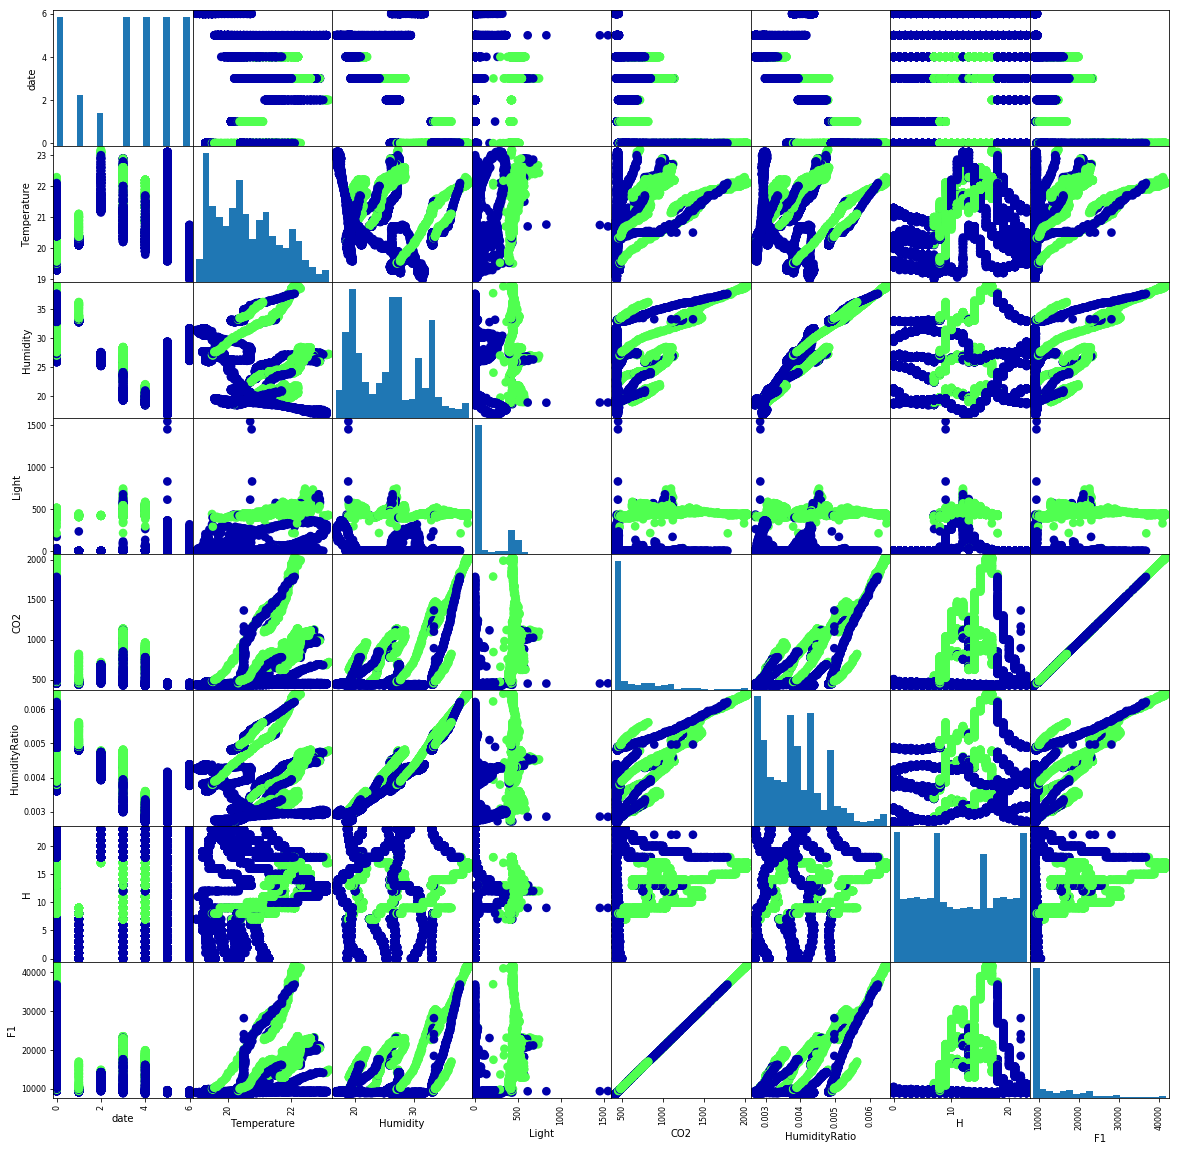

In [22]:
first_dataframe = pd.DataFrame(xtrain_f1, columns=xtrain_f1)
pd.plotting.scatter_matrix(xtrain_f1, c = ytrain, figsize = (20,20), marker='o', 
                           hist_kwds={'bins': 20}, s=75, alpha=1, cmap=mglearn.cm3)
plt.show()

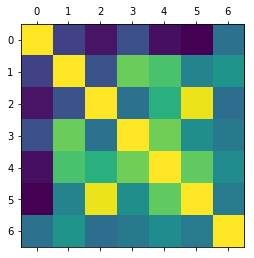

In [23]:
plt.matshow(xtrain.corr())

### As shown, 

#### Before giving the score, let's remember previous (with only weekday and hour) score with 20 neighbors:

In [24]:
n = 5
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(xtrain, ytrain)

print("KNN TRAIN score with " + str(n) +" neighbors: {}".format(knn.score(xtrain, ytrain)))
print("KNN TEST1 score with " + str(n) +" neighbors: {}".format(knn.score(xtest, ytest)))
print("KNN TEST2 score with " + str(n) +" neighbors: {}".format(knn.score(xtest2, ytest2)))

KNN TRAIN score with 5 neighbors: 0.9927545130787179
KNN TEST1 score with 5 neighbors: 0.9425891181988743
KNN TEST2 score with 5 neighbors: 0.9615463494667761


#### Now let's see score with F1:

In [25]:
knn.fit(xtrain_f1, ytrain)

print("KNN TRAIN score with " + str(n) +" neighbors: {}".format(knn.score(xtrain_f1, ytrain)))
print("KNN TEST1 score with " + str(n) +" neighbors: {}".format(knn.score(xtest_f1, ytest)))
print("KNN TEST2 score with " + str(n) +" neighbors: {}".format(knn.score(xtest2_f1, ytest2)))

KNN TRAIN score with 5 neighbors: 0.9910352449957018
KNN TEST1 score with 5 neighbors: 0.9722326454033771
KNN TEST2 score with 5 neighbors: 0.9536505332239541


#### And there is a chart with F1 feature:

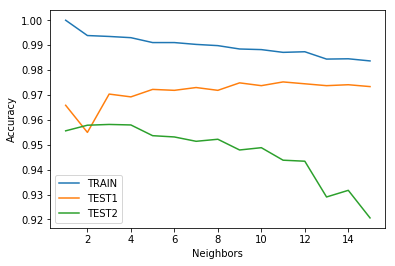

In [26]:
set_neighbors = range(1, 16)
train_acc = []
test1_acc = []
test2_acc = []

for n in set_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain_f1, ytrain)
    train_acc.append(knn.score(xtrain_f1, ytrain))
    test1_acc.append(knn.score(xtest_f1, ytest))
    test2_acc.append(knn.score(xtest2_f1, ytest2))
    
plt.plot(set_neighbors, train_acc, label="TRAIN")
plt.plot(set_neighbors, test1_acc, label="TEST1")
plt.plot(set_neighbors, test2_acc, label="TEST2")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

#### Now, we are going to engine another feature.

    I want to add a feature that weekday and hours are concatenated, like on Wednesday at 3 PM: 215. Because if I don't, five days in a week, in most office hours, Occupancy is 1. But at the weekend it's 0 even in office hours. Thus, our model may stumble about weekend-office hours. Thus I want to merge two of them and distinguish weekend-office hours and weekday-office hours.
    
    For example on Sunday at 3 PM, new feature will take the value '615', 6 for sunday and 15 for 3 PM.
    
    The new feature will called F2 due to it's the second feature we engined.

In [27]:
xtrain_f2 = xtrain_f1.loc[:, xtrain_f1.columns.values]
xtest_f2 = xtest_f1.loc[:, xtest_f1.columns.values]
xtest2_f2 = xtest2_f1.loc[:, xtest2_f1.columns.values]

xtrain_f2["F2"] = xtrain_f2["date"].map(str) + xtrain_f2["H"].map(str)

xtest_f2["F2"] = xtest_f2["date"].map(str) + xtest_f2["H"].map(str)

xtest2_f2["F2"] = xtest2_f2["date"].map(str) + xtest2_f2["H"].map(str)


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain_f2, ytrain)

print("KNN TRAIN score with " + str(n) +" neighbors: {}".format(knn.score(xtrain_f2, ytrain)))
print("KNN TEST1 score with " + str(n) +" neighbors: {}".format(knn.score(xtest_f2, ytest)))
print("KNN TEST2 score with " + str(n) +" neighbors: {}".format(knn.score(xtest2_f2, ytest2)))

KNN TRAIN score with 15 neighbors: 0.994473781161734
KNN TEST1 score with 15 neighbors: 0.974108818011257
KNN TEST2 score with 15 neighbors: 0.9649302707136997


#### And here is chart with F2 feature:

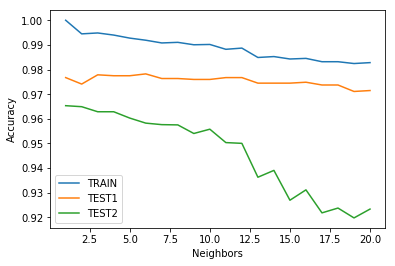

In [28]:
set_neighbors = range(1, 21)
train_acc = []
test1_acc = []
test2_acc = []

for n in set_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain_f2, ytrain)
    train_acc.append(knn.score(xtrain_f2, ytrain))
    test1_acc.append(knn.score(xtest_f2, ytest))
    test2_acc.append(knn.score(xtest2_f2, ytest2))
    
plt.plot(set_neighbors, train_acc, label="TRAIN")
plt.plot(set_neighbors, test1_acc, label="TEST1")
plt.plot(set_neighbors, test2_acc, label="TEST2")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

#### And for last, here is F2 feature's success from 0 to 20 neighbors.

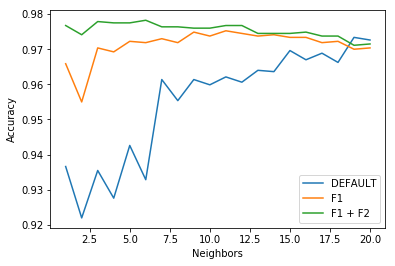

In [29]:
set_neighbors = range(1, 21)
nof_acc = []
f1_acc = []
f2_acc = []

for n in set_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain, ytrain)
    nof_acc.append(knn.score(xtest, ytest))

for n in set_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain_f1, ytrain)
    f1_acc.append(knn.score(xtest_f1, ytest))
    
for n in set_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain_f2, ytrain)
    f2_acc.append(knn.score(xtest_f2, ytest))
    
plt.plot(set_neighbors, nof_acc, label="DEFAULT")
plt.plot(set_neighbors, f1_acc, label="F1")
plt.plot(set_neighbors, f2_acc, label="F1 + F2")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

### 3.3. Linear Models

### I will just pass some basic characteristics about this algorithm:

    - Linear models makes predictions using linear functions, as we saw at highschool in the past years.[1]
    - Prediction is a line for a single feature, a plane for two, or a hyperplane for higher dimensions (when using 
    many features.[1]
    - For datasets with many classes, linear methods can be very powerful.[1]
    
    There is Linear Regression models and it's derivations called Ridge (L2) and Lasso (L1). But since our problem is classification, we just skip them and pass trough Logistic Regression from Linear Classification.
    
[1]

### 3.3.1. Linear Classification

    Linear calssification uses the same method as Linear Regression models, it it checks if the y is greater or below than zero, which is be of use classification. If it is, the class is a, if it's not, the class is b (for binary classifications).
    
    The most common linear classification algorithms are logistic regression and linear support vector machines. [1]
    
##### We will discuss and test with logistic regression algorithm.

    First of all, we will look the score for raw data ve had, with no additional features:

In [30]:
from sklearn.linear_model import LogisticRegression

print(xtrain[:1])

logreg = LogisticRegression().fit(xtrain, ytrain)
print("\nTraining set score: {:.3f}".format(logreg.score(xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg.score(xtest, ytest)))
print("Test set2 score: {:.3f}".format(logreg.score(xtest2, ytest2)))

   date  Temperature  Humidity  Light     CO2  HumidityRatio   H
0     2        23.18    27.272  426.0  721.25       0.004793  17

Training set score: 0.988
Test set score: 0.979
Test set2 score: 0.992


##### Now let's see with engined datasets:

In [31]:
print(xtrain_f2[:1])

logreg = LogisticRegression().fit(xtrain_f2, ytrain)
print("\nTRAINING set score: {:.5f}".format(logreg.score(xtrain_f2, ytrain)))
print("TEST2 set score: {:.5f}".format(logreg.score(xtest2_f2, ytest2)))

   date  Temperature  Humidity  Light     CO2  HumidityRatio   H  \
0     2        23.18    27.272  426.0  721.25       0.004793  17   

             F1   F2  
0  14871.514076  217  

TRAINING set score: 0.98833
TEST2 set score: 0.97888


#### There is another control parameter in Logistic Regression called C parameter.

    C determines the regularization strenght.
    
    Higher values of C correspond to less reguralization. Which means, if the raguralizaton is low, the algorithm will try to be as complex as can have, which may cause overfitting; and it we make C too hight, which means the model will be flexible that may cause to underfitting.

In [32]:
print("C = 100:")
logreg100 = LogisticRegression(C=100).fit(xtrain_f2, ytrain)
print("Training set score: {:.5f}".format(logreg100.score(xtrain_f2, ytrain)))
print("Test2 set score: {:.5f}".format(logreg100.score(xtest2_f2, ytest2)))

C = 100:
Training set score: 0.98821
Test2 set score: 0.98164


In [33]:
print("C = 0.01:")
logreg001 = LogisticRegression(C=0.01).fit(xtrain_f2, ytrain)
print("Training set score: {:.5f}".format(logreg001.score(xtrain_f2, ytrain)))
print("Test2 set score: {:.5f}".format(logreg001.score(xtest2_f2, ytest2)))

C = 0.01:
Training set score: 0.98833
Test2 set score: 0.97929


    As we see, there is no such differece in scores in variety with C parameter and the score is already high. That means, it's not mandotory to make our model more flex or strict.
    
##### C parameter's chart:

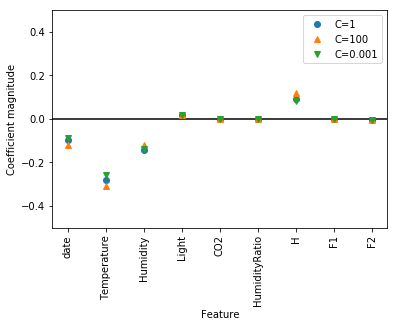

In [34]:
features = ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'H']
f2_features = ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'H', 'F1', 'F2']

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(9), f2_features, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-0.5, 0.5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

## 3.4. Decision Trees
    
    In basic, a decision tree asks questions to data, get an answer, and asks another question.
    
    For example:

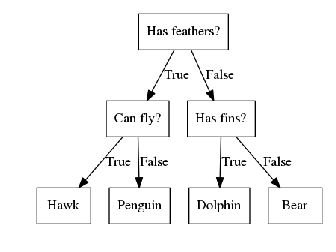

In [35]:
mglearn.plots.plot_animal_tree()

##### Learning decision trees means learning the sequence of if else questions that gets us to the true answer quickly.[1]

    Even if the data is not binary, the algorithm asks questions like 'greater than', 'equal to' ect.
    
    To build a tree, the algorithm searches over all the possible tests and finds the one that is most informative.[1]
    
    If a leaf contains points that all of them share same target value, this leaf called 'pure'.
    
    For example, amount of people who have salary greater than 40,000 and owns a car; amount of no one have is 0, and amount of 50 people is, called pure leave.

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(xtrain_f2, ytrain)
print("TRAINING set score: {:.5f}".format(tree.score(xtrain_f2, ytrain)))
print("TEST2 set score: {:.5f}".format(tree.score(xtest2_f2, ytest2)))

TRAINING set score: 1.00000
TEST2 set score: 0.97108


##### Here again, the model is overfitted, because the leaves might be pure and there is no limit to stop the tree to not to memorize the training data.

    Now we can apply pre-prunning: limiting the depth of tree, amount of leaves, stopping creation of the tree too early.

In [44]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(xtrain_f2, ytrain)
print("TRAINING set score: {:.5f}".format(tree.score(xtrain_f2, ytrain)))
print("TEST2 set score: {:.5f}".format(tree.score(xtest2_f2, ytest2)))

TRAINING set score: 0.98993
TEST2 set score: 0.98903


#### Our constraints managed to prevent the tree to memorize the training set by limiting the depth of tree. So our test accuracy got higher and close to training score. Since too much closeness might mean undefitting, but .989 is enough to get an accuracy, so we don't say we have underfitting.

Feature importances with basic features:
[ 0.          0.00586364  0.          0.96905164  0.          0.0015241
  0.01184298  0.00801712  0.00370052]


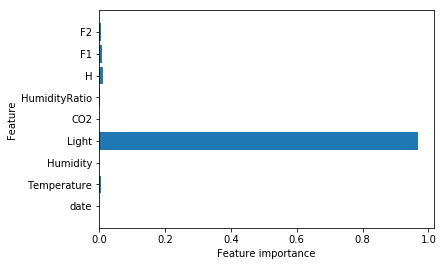

In [47]:
print("Feature importances with basic features:\n{}".format(tree.feature_importances_))

def plot_feature_importances(tree):
    n_features = xtrain_f2.shape[1]
    plt.barh(range(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), f2_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

### 3.4.1. Ensembled of Decision Trees

#### 3.4.1.1 Random Forest


In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5, random_state=2)
rf.fit(xtrain_f2, ytrain)
print("TRAINING set score: {:.5f}".format(rf.score(xtrain_f2, ytrain)))
print("TEST2 set score: {:.5f}".format(rf.score(xtest2_f2, ytest2)))

TRAINING set score: 0.99889
TEST2 set score: 0.94309


In [53]:
for i in range(1,11):
    rf = RandomForestClassifier(n_estimators=i, random_state = 2)
    rf.fit(xtrain_f2, ytrain)
    print("TEST2 set score w/ " +str(i)+" depth: {}".format(rf.score(xtest2_f2, ytest2)))

TEST2 set score w/ 1 depth: 0.8989950779327317
TEST2 set score w/ 2 depth: 0.8793068088597211
TEST2 set score w/ 3 depth: 0.875
TEST2 set score w/ 4 depth: 0.9263740771123872
TEST2 set score w/ 5 depth: 0.9430885972108285
TEST2 set score w/ 6 depth: 0.9377563576702215
TEST2 set score w/ 7 depth: 0.9607260049220673
TEST2 set score w/ 8 depth: 0.9663658736669402
TEST2 set score w/ 9 depth: 0.9742616899097621
TEST2 set score w/ 10 depth: 0.9796964725184577


#### 3.4.1.2. Gradient Boosting Machines

    In the addition to random forest, this model provides serial trees, and each one tries to corret previous tree's mistakes. So this way, there will be less chance to overfit, because it's like taking the mean of random forest, and have strong pre-prunning usage. 
    
    Another important parameter of GBM is the learning rate, which determines the strongness of correcting the mistakes. As you may think, the more rate it has, the more chance to overfit will be.
    
    GBM are now the most powerful algorithm in a wide area.

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=2)
gbm.fit(xtrain, ytrain)
print("TRAINING set score: {:.5f}".format(gbm.score(xtrain, ytrain)))
print("TEST2 set score: {:.5f}".format(gbm.score(xtest2, ytest2)))

TRAINING set score: 0.99816
TEST2 set score: 0.95775


#### As seen, we are overfitted again.

    Like before, we can use pre-prunning, limiting the tree by makximum depth parameter, and get out of overfitting:

In [76]:
gbm = GradientBoostingClassifier(max_depth=1, random_state=2)
gbm.fit(xtrain, ytrain)
print("TRAINING set score: {:.5f}".format(gbm.score(xtrain, ytrain)))
print("TEST2 set score: {:.5f}".format(gbm.score(xtest2, ytest2)))

TRAINING set score: 0.98858
TEST2 set score: 0.96370


#### As expected, lowering the max depth of tree reduces the memorizing train set, decreased training score but provided better generalization. Let's hit the learning rate parameter, too:

In [90]:
gbm = GradientBoostingClassifier(learning_rate=0.005, random_state=2, max_depth=1)
gbm.fit(xtrain_f2, ytrain)
print("TRAINING set score: {:.5f}".format(gbm.score(xtrain_f2, ytrain)))
print("TEST2 set score: {:.5f}".format(gbm.score(xtest2_f2, ytest2)))

TRAINING set score: 0.98784
TEST2 set score: 0.99313


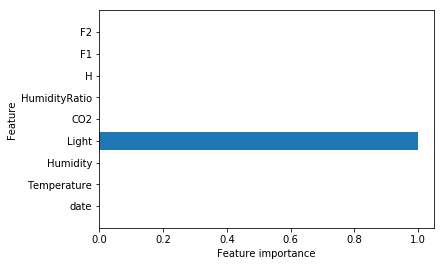

In [92]:
def plot_feature_importances(gbm):
    n_features = xtrain_f2.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), f2_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbm)

In [104]:
# from sklearn.svm import LinearSVC
# lsvc=LinearSVC()
# lsvc.fit(xtrain, ytrain)
# mglearn.plots.plot_2d_separator(lsvc, pd.DataFrame(xtrain))
# mglearn.discrete_scatter(xtrain.iloc[:, 0], xtrain.iloc[:, 1], ytrain)
# plt.xlabel("Feature 0")
# plt.ylabel("Feature 1")

# plt.show()